## Plot model performances over sampling ratios

Float: 4903217


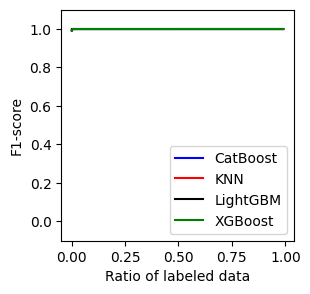

Float: 4903218


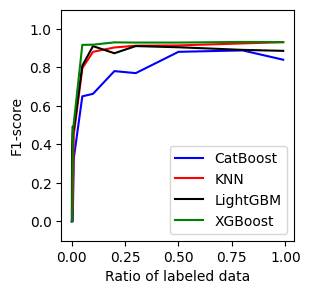

Float: 4903220


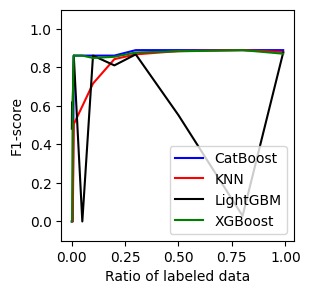

Float: 4903052


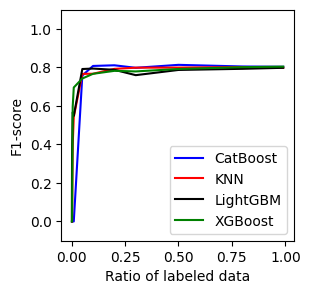

Float: 4903054


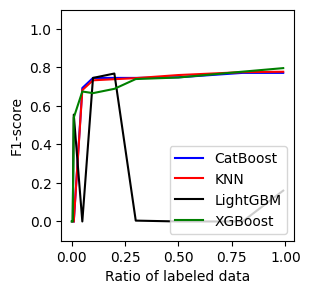

In [4]:
import pandas as pd
import matplotlib.pyplot as plt



# Define markers and labels for each model
# model_markers = {
#     'KNN': 'o',
#     'XGBoost': 's',
#     'CatBoost': 'D',
#     'LightGBM': 'v'
# }

COLOR_MAP = {
        'KNN': 'red',
        'XGBoost': 'green',
        'CatBoost': 'blue',
        'LightGBM': 'black'
    }
# COLOR_MAP = {
#         'KNN': 'black',
#         'XGBoost': 'black',
#         'CatBoost': 'black',
#         'LightGBM': 'black'
#     }
# COLOR_MAP = {
#         '4903217': 'green', 
#         '4903218': 'purple',
#         '4903220': 'blue',
#         '4903052': 'yellow', 
#         '4903054': 'black'
#     }

LABEL_MAP = {
        '4903217': 'DS_high', 
        '4903218': 'DS_low1',
        '4903220': 'DS_low2',
        '4903052': 'DS_low3', 
        '4903054': 'DS_low4'
}

# LINE_MAP = {
#         'KNN': '-',
#         'XGBoost': ':', 
#         'CatBoost': '-.',
#         'LightGBM': '--', 
#         # 'KNN+XGBoost+CatBoost+LightGBM': '-',
#     }

# Plot the F1 scores for each model with decreasing sampling ratios using different markers and labels
for float_number in float_numbers: 
# for float_number in ['4903218']: 
    fig, ax = plt.subplots(figsize=[3,3])
    
    output_file = os.path.join(RESULT_DIR, f'{float_number}/random_sampling.csv')
    figure_file = os.path.join(PLOT_DIR, f'random_sampling_{float_number}.png')  # Path to save the figure

    # Read the results from the output file
    results_df = pd.read_csv(output_file)

    # Filter the results to exclude the specified model
    filtered_results = results_df

    for model_name, model_results in results_df.groupby('Model'):        
        ax.plot(model_results['Sampling Ratio'].to_numpy(), model_results['F1-score'], linewidth=1.5, label=f'{model_name}', color=COLOR_MAP[model_name])
        # ax.semilogx(x_values, sorted_results['F1-score'], linewidth=1.5, label=f'{LABEL_MAP[float_number]}, {model_name}', color=COLOR_MAP[float_number], linestyle=LINE_MAP[model_name])
        # ax.plot(model_results['Sampling Ratio'].to_numpy(), model_results['F1-score'], linewidth=1.5, label=f'{LABEL_MAP[float_number]}, {model_name}', color=COLOR_MAP[float_number], linestyle=LINE_MAP[model_name])
    
    plt.xlabel('Ratio of labeled data')
    plt.ylabel('F1-score')
    plt.ylim([-0.1, 1.1])
    plt.legend(loc='lower right')

    # Save the figure with a tight bounding box
    plt.savefig(figure_file, dpi = 300, bbox_inches='tight')

    # Show the plot
    print(f"Float: {float_number}")
    plt.show()